# 우리 기업의 VIP 고객들은 어떤 게임 플레이를 하고 있을까?

## 상황 인식과 문제 정의

### 1) 상황 인식
게임 플레이어의 게임 경험을 만족시키고 유지시키기 위한 안정적인 운영 전략이 필요 <br>
전략 RPG 게임인 Mine Ground는 밸런스를 유지하거나 PK, 다양한 boss, mining 등 다양한 즐길거리를 꾸준하게 제공해야 함

### 2) 문제 정의
> 핵심 문제: 우리 VIP 고객들은 어떤 게임 플레이를 하고 있을까?

VIP 고객들이 즐겨하는 플레이를 유도하는 게임 업데이터를 수행하면 다른 고객들과 함께 게임을 더 오래 많이 즐길 것이다.

## 데이터 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

# customer_data 변수를 만들고 customer_for_cluster.csv 파일의 데이터를 할당
customer_data = pd.read_csv('./data/customer_for_cluster.csv')

# customer_data의 head 값 확인하기
customer_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434


In [2]:
# customer_data의 정보 확인하기
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Install      18506 non-null  object 
 1   Time_stamp   18506 non-null  object 
 2   Status       18506 non-null  object 
 3   ID           18506 non-null  object 
 4   Payment      18506 non-null  int64  
 5   Game_Name    18506 non-null  object 
 6   Level_score  18506 non-null  float64
 7   Time_score   18506 non-null  float64
 8   PK           18506 non-null  float64
 9   BOSS         18506 non-null  float64
 10  Gacha        18506 non-null  float64
 11  Attack       18506 non-null  float64
 12  Mining       18506 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


18506건의 데이터, 7개의 feature <br>
- `Level_score`(레벨점수: 플레이어들이 획득한 게임 내 레벨 점수)
- `Time_score`(시간점수: 플레이어들이 플레이한 게임 내 시간 점수)
- `PK`(플레이어킬: 게임 안에서 PK한 횟수를 수치화)
- `BOSS`(보스플레이: 게임 안에서 BOSS를 잡은 횟수를 수치화)
- `Gacha`(가챠플레이: 게임 안에서 아이템을 구매한 횟수를 수치화)
- `Attack`(어택포인트: 게임 안에서 몬스터를 사냥한 횟수를 수치화)
- `Mining`(마이닝포인트: 게임 안에서 채집, 수집 등 자원채취 횟수를 수치화)

### 군집 분석

데이터의 각 feature에서 `Level_score`와 `Time_score`를 이용해 게임 내 VIP 고객을 분류할 수 있다. <br>
이런 경우 일반적으로 __군집 분석(Cluster Analysis)__ 이 사용된다.

In [3]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

# customer_data 중 Level_score와 Time_score를 골라내 temp_var로 저장
temp_var = customer_data[['Level_score','Time_score']]
temp_var

,Level_score,Time_score
0,83.156420,71.314875
1,85.171839,73.128354
2,82.928130,70.780184
3,83.700084,77.175798
4,86.330819,76.646228
...,...,...
18501,28.755368,63.765649
18502,27.767066,58.762254
18503,30.275532,37.941294
18504,28.758063,65.117374


In [4]:
# temp_var의 각 값들을 정규화
temp_var = preprocessing.StandardScaler().fit(temp_var).transform(temp_var)

In [6]:
# 군집분석을 하기 위해 Kmeans 변수를 만들고 군집분석 초기 모델을 할당
Kmeans = KMeans(n_clusters=5, # 군집 개수는 5개 도출
                init='k-means++', # 모델 초기화 방법은 K-means++ 사용
                n_init=10, # 모델의 초기화 횟수 (초기화-학습 10회 반복 후 최선의 결과 선택)
                verbose=False, # 군집분석 수행 중 각 단계별 메세지 출력 여부
                max_iter=100, # 최대 반복 횟수
                random_state=1111 # 랜덤시드 고정
                            )

# 할당된 군집분석 모델에 temp_var를 적용(fit)
Kmeans.fit(temp_var)

KMeans(max_iter=100, n_clusters=5, random_state=1111, verbose=False)

In [7]:
# 분류된 각 군집이름(Label)을 변수 Cluster_label로 할당
cluster_label = Kmeans.labels_

# 할당된 Cluster_label을 customer_data의 Cluster열 값으로 할당
customer_data['Cluster'] = pd.DataFrame(cluster_label)
customer_data

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining,Cluster
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489,1
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619,1
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637,1
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521,1
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,2022-05-09,2022-05-10,play,Danielle_910,0,Mine Ground,28.755368,63.765649,30.427502,58.852150,56.549457,24.272387,46.070132,3
18502,2022-04-04,2022-04-23,play,Marilyn_968,0,Mine Ground,27.767066,58.762254,54.093863,69.246963,65.541975,41.359648,36.397338,3
18503,2022-01-15,2022-01-16,play,Monique_818,0,Mine Ground,30.275532,37.941294,12.596498,46.007774,64.563203,31.749220,37.573881,2
18504,2022-01-29,2022-02-03,play,Mark_684,0,Mine Ground,28.758063,65.117374,51.919927,63.716950,58.105054,40.035940,41.720459,3


In [8]:
# customer_data의 Cluster열의 각 고유값 계산하기
customer_data['Cluster'].value_counts()

0    3915
1    3701
2    3698
4    3687
3    3505
Name: Cluster, dtype: int64

In [9]:
# RFM_data의 Class를 기준으로 Recency, Frequency, Monetary의 평균값 집계
temp_var = customer_data.groupby('Cluster').agg({'Time_score': 'mean', 'Level_score':'mean', 'Payment':'mean'}).round(1)
temp_var

,Time_score,Level_score,Payment
Cluster,,,
0,54.3,27.7,932.1
1,73.6,85.7,1019.3
2,40.2,27.4,990.0
3,62.6,31.3,1019.7
4,47.8,14.6,861.0


1번 군집이 눈에 띈다. 다른 군집들에 비해서 `Level_score`가 월등히 높고, `Time_score`도 가장 높다. 그리고 `Payment` 역시 높은 수준을 보이고 있다. <br>
1번 군집에 속한 고객들이 VIP, 즉 상위 랭커들이라고 볼 수 있을 것 같다.

#### 시각화

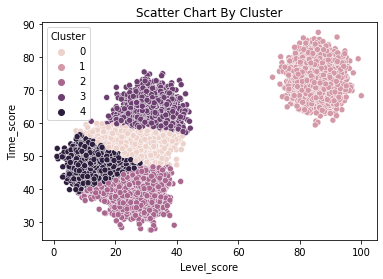

In [10]:
# 각 군집별 Level_score와 Time_score를 산포도로 시각화
ax = sns.scatterplot(data=customer_data, x='Level_score', y='Time_score', hue='Cluster')
plt.title('Scatter Chart By Cluster')
plt.show()

In [11]:
# 시각화를 위해 temp_var의 결과값을 전처리합니다. 
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index()
temp_var = temp_var.rename(columns = {'index':'Cluster'})
temp_var

,Cluster,Time_score,Level_score,Payment
0,0,54.3,27.7,932.1
1,1,73.6,85.7,1019.3
2,2,40.2,27.4,990.0
3,3,62.6,31.3,1019.7
4,4,47.8,14.6,861.0


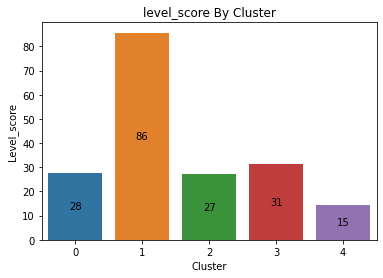

In [12]:
# 각 Cluster별 평균 Level_score를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Cluster', y='Level_score')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('level_score By Cluster')
plt.show()

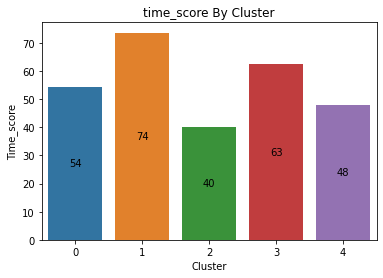

In [13]:
# 각 Cluster별 평균 Time_score를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Cluster', y='Time_score')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('time_score By Cluster')
plt.show()

### 상관관계 분석
`Time_score`에 영향을 미치는 게임 행동들을 찾아내기 위해 상관관계 분석

In [14]:
# customer_data의 Time_score, PK, BOSS, Gacha, Attack, Mining의 열값을 골라내고 상관관계분석하기
corr_data = customer_data[['Time_score', 'PK', 'BOSS', 'Gacha', 'Attack', 'Mining']].corr().round(2)
corr_data

,Time_score,PK,BOSS,Gacha,Attack,Mining
Time_score,1.00,0.32,0.06,-0.08,0.08,0.63
PK,0.32,1.00,0.65,0.05,-0.14,0.24
BOSS,0.06,0.65,1.00,-0.17,0.02,-0.08
Gacha,-0.08,0.05,-0.17,1.00,-0.69,-0.05
Attack,0.08,-0.14,0.02,-0.69,1.00,0.06
Mining,0.63,0.24,-0.08,-0.05,0.06,1.00


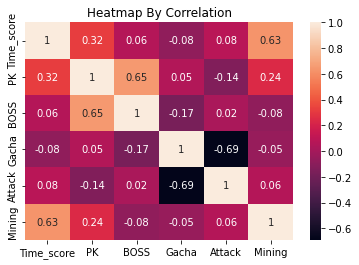

In [15]:
# 상관관계분석 결과 시각화하기 
sns.heatmap(data = corr_data, annot=True)
plt.title('Heatmap By Correlation')
plt.show()

`Time_score`와 가장 높은 상관관계를 보이는 것 `PK`와 `Mining`이고, 나머지 행동 요소들은 비슷한 수준을 보이고 있다.

### Radar Chart를 이용한 집계 결과 시각화
VIP들이 모여있는 1번 클러스터의 게임 내 행동 양식을 도출해보자. <br>
이때 __Radar Chart__ 가 유용하게 사용된다.

In [16]:
# # customer_data의 Cluster를 기준으로 PK, BOSS, Gacha, Atteck, Mining의 평균값 집계
temp_var = customer_data.groupby('Cluster').agg({'PK': 'mean', 'BOSS':'mean', 'Gacha':'mean', 'Attack':'mean', 'Mining':'mean'}).round(1)
temp_var

,PK,BOSS,Gacha,Attack,Mining
Cluster,,,,,
0,36.5,56.9,53.9,40.7,44.3
1,54.7,59.1,49.0,45.4,70.9
2,36.1,56.8,53.8,40.6,44.3
3,36.6,56.8,54.5,40.2,44.1
4,36.6,56.8,54.0,40.6,44.4


In [17]:
# 집계결과 시각화를 위한 전처리
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index(drop=True)
temp_var

,PK,BOSS,Gacha,Attack,Mining
0,36.5,56.9,53.9,40.7,44.3
1,54.7,59.1,49.0,45.4,70.9
2,36.1,56.8,53.8,40.6,44.3
3,36.6,56.8,54.5,40.2,44.1
4,36.6,56.8,54.0,40.6,44.4


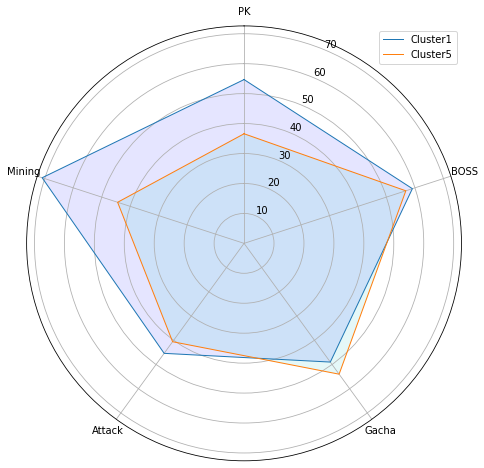

In [18]:
# Radar Chart를 이용한 집계결과 시각화
from math import pi

# Radar Chart의 각 방향 개수 정의
categories=list(temp_var)
N = len(categories)

# 방향변수 개수에 따른 레이더 차트 각(angle) 정의
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# 초기 레이더 차트 생성
plt.figure(figsize=(8,8)) #차트 크기
ax = plt.subplot(111, polar=True) #sub차트 생성

# 12시 방향을 기준으로 차트 생성
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# 레이더차트에 Cluster1 표기
values = temp_var.loc[1].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster1')
ax.fill(angles, values, 'b', alpha=0.1)

# 레이더차트에 Cluster5 표기
values = temp_var.loc[4].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster5')
ax.fill(angles, values, 'c', alpha=0.1)

# 각 변수이름 부여
plt.xticks(angles[:-1], categories)
plt.legend()
plt.show()

`Time_score`와 `Level_score`가 높은 1번 클러스터와 낮은 5번 클러스터를 직접 비교해보니 유의미한 결과가 나왔다. <br>
게임을 오래 즐기고, 레벨이 높은 1번 클러스터의 고객들은 5번 클러스터의 고객들보다 높은 수준의 `Mining`과 `PK`를 수행하고 있다. <br>
즉, `Mining`과 `PK`에 집중된 게임 콘텐츠 업데이트를 진행하면 더 많은 고객들이 오랫동안 게임을 즐길 수 있을 것이다.

### 전략 수립 및 실행

지금까지 분석 결과를 통해 다음과 같은 사실을 확인할 수 있었다.

- Mine Ground의 경우 게임을 오랫동안 즐기는 1번 클러스터가 존재한다.
- 다른 클러스터의 고객들은 상대적으로 게임을 오래즐기지 않고, 레벨이 낮은 편이다.
- 1번 클러스터 고객들이 게임 안에서 보이는 행동패턴을 파악하고, 다른 클러스터 고객들이 쉽게 따라할 수 있도록 업데이트를 하자.
- 이번 업데이트를 통해서 사람들이 게임에 더 쉽게 몰입하고, 오랫동안 게임을 즐길 수 있을 것이다.

게임에 몰입하는데 필요한 다양한 콘텐츠들이 더 많이 존재할것으로 짐작된다. 하지만 우선 현재 게임에 몰입한 고객들의 행동을 벤치마킹해서 다른 고객들이 쉽게 따라할 수 있도록 업데이트를 하는 것이 시급해보인다. <br>

즉, 더 활발한 Mining을 유도하기 위해서 다양한 채집아이템과 수집요소들을 제공하고,
NPC들이나 몬스터가 아닌 플레이어들 간 PK를 유도하기 위한 적절한 조치가 수행되면
기존 고객들은 더 몰입해서 게임을 할 수 있을 것 같다.